# Work on the OCSEAN DATA

This is incomplete.

In [2]:
import pandas as pd
from lingpy import * # We're just importing everything from lingpy for simplicity
from lingpy.sequence.sound_classes import ipa2tokens
import re
import os
import math

In [91]:
def ipa2tokens_list(d):
    ## Takes a list of dataframe column
    ## Apply transformation to words that are present, and collapse that back to a string
    ret = [''.join(ipa2tokens(x)) for x in d]
    return ret

def check(od, symbol, reportok=False):
    ## Check for a symbol in all languages
    languages = list(od['doculect'].unique())
    total=0
    for language in languages:
        tlang=od[od['doculect']==language]
        test=tlang['form'].str.contains(symbol, regex=False)
        if (any(test)):
            total += test.sum()
            print(language,"contains",
                  test.sum(), "of the",symbol,"symbol")
        elif reportok:
            print(language, "OK!")
    if total > 0:
        print("==== FOUND",total,"OF THE",symbol,"SYMBOL ====")
    reurn total

In [92]:
od = pd.read_table('OCSEAN_initial_joineddata.tsv')
od=od[['ID','concept','form','doculect']]
od['form']=od['form'].str.split(',')
od=od.explode('form')
od['form']=od['form'].str.split(';')
od=od.explode('form')
od=od.dropna()
od['ID']=range(od.shape[0])
print(od.head(15))
print(od.shape)

    ID    concept              form       doculect
0    0        sun             wariy  Abui_Bunggeta
1    1       moon              'uya  Abui_Bunggeta
2    2       star             furiy  Abui_Bunggeta
3    3        sky            'adiiy  Abui_Bunggeta
4    4      Earth              buku  Abui_Bunggeta
5    5      Earth             bukuw  Abui_Bunggeta
6    6      cloud            taboqi  Abui_Bunggeta
7    7       wind            simooi  Abui_Bunggeta
8    8       wind             smooi  Abui_Bunggeta
9    9       rain             anuui  Abui_Bunggeta
10  10    drizzle  anuui wobiyaanra  Abui_Bunggeta
11  11    drizzle   anuui wobiyaana  Abui_Bunggeta
12  12    drizzle      anuui paawal  Abui_Bunggeta
13  13        dew               moo  Abui_Bunggeta
14  14  mist; fog            taboqi  Abui_Bunggeta
(70531, 4)


In [93]:
od.loc[4270:4280,:]

,ID,concept,form,doculect
4270,4270,cave,bulwat kuweba,Agutaynen
4271,4271,water,we,Agutaynen
4272,4272,sea,talce,Agutaynen
4273,4273,ocean,laod,Agutaynen
4273,4274,ocean,kadadaliman,Agutaynen
4274,4275,rough,magaspang,Agutaynen
4275,4276,clear,malerao,Agutaynen
4276,4277,murky,maligmoc,Agutaynen
4277,4278,foam,bula,Agutaynen
4278,4279,lake,kawiyan,Agutaynen


In [94]:
## This is how I got the "ė" symbol
## od.loc[25649:25685,:]

In [95]:
badsymbols=['(',')', # Brackets
            ' ','\t', # Spaces
            'ė', 'ό', 'ǹ', 'ѐ', # Accented symbols
            '\'','’','´', # quotes used as glottels
            '–','-','=', # separator symbols? NB these are technically different!
            '\\','?','…' # others!
           ]

In [96]:
for symbol in badsymbols:
    check(od,symbol,verbose=False)

Abui_Bunggeta contains 1 of the ( symbol
Agusan_Manobo contains 2 of the ( symbol
Akeanon contains 2 of the ( symbol
Arta contains 18 of the ( symbol
Balangao contains 1 of the ( symbol
Bali_Aga contains 2 of the ( symbol
Boholano contains 1 of the ( symbol
Ivatan_Ichbayatan contains 24 of the ( symbol
Kankana_ey contains 11 of the ( symbol
Kapampangan contains 4 of the ( symbol
Kinaray_a contains 1 of the ( symbol
Loloan_Malay contains 2 of the ( symbol
Manubo_Tasaday contains 1 of the ( symbol
Sabu_Raijua contains 2 of the ( symbol
Tagbanwa_Central contains 2 of the ( symbol
Talaandig contains 2 of the ( symbol
==== FOUND 76 OF THE ( SYMBOL ====
Abui_Bunggeta contains 1 of the ) symbol
Agusan_Manobo contains 2 of the ) symbol
Akeanon contains 2 of the ) symbol
Arta contains 18 of the ) symbol
Balangao contains 1 of the ) symbol
Bali_Aga contains 2 of the ) symbol
Boholano contains 1 of the ) symbol
Ivatan_Ichbayatan contains 24 of the ) symbol
Kankana_ey contains 11 of the ) symbol
K

In [177]:
## Brackets - throw away everything!
od['form'] = od['form'].str.split('(').str[0]
## Symbols
od['form']=[x.replace('–','') for x in od['form']] # long dash
od['form']=[x.replace('-','') for x in od['form']] # short dash
od['form']=[x.replace('=','') for x in od['form']] # equals
od['form']=[x.replace(')','') for x in od['form']] # end brackets - shouldn't be here, but are
od['form']=[x.replace('\'', 'ʔ') for x in od['form']] # the ' character, glottal stop?. This is special in Python so we've "escaped" it here with a \, to match the actual character
od['form']=[x.replace('’', 'ʔ') for x in od['form']] # all the different types of quote symbol- glottal stop?
od['form']=[x.replace('´', 'ʔ') for x in od['form']] # all the different types of quote symbol- glottal stop?
od['form']=[x.replace('‘', 'ʔ') for x in od['form']] # all the different types of quote symbol- glottal stop?
od['form']=[x.replace('?', '') for x in od['form']] # question mark
od['form']=[x.replace('\\', '') for x in od['form']] # the backslash symbol. This could be encoding something like IPA?
## Phonetics
od['form']=[x.replace('ė', 'ɛ') for x in od['form']] # Doesn't match
### od['form']=[x.replace(u"\u0113", 'ɛ') for x in od['form']] # Doesn't match
od['form']=[x.replace('ό', 'ɔ̝') for x in od['form']]
od['form']=[x.replace('ǹ', 'n̪') for x in od['form']]
od['form']=[x.replace('ѐ', 'e') for x in od['form']] # The IPA should be /e/ but that isn't single character?
# Cases, numbers, spaces
od['form']=[x.replace('…', '') for x in od['form']]
od['form']=[x.lower() for x in od['form']]
od['form']=[re.sub(r'[\d]+', '', x) for x in od['form']]
od['form']=[re.sub(r'[\s]+', '.', x) for x in od['form']]
od = od[od['form'] != '']
od = od[od['form'] != '.']
##od.loc[:,'ID']=od.index+1

In [178]:
check(od)

Abui_Bunggeta OK!
Abui_Kilakawada OK!
Abui_Mobyetang OK!
Abui_Pelman OK!
Agusan_Manobo OK!
Agutaynen OK!
Akeanon OK!
Arta OK!
Ata OK!
Ati OK!
Ba_a OK!
Balangao OK!
Bali_Aga OK!
Balinese OK!
Batak OK!
Bicolano OK!
Boholano OK!
Bolinao OK!
Bontoc OK!
Buhid OK!
Bulus OK!
Chabacano_Caviteno OK!
Cuyunon OK!
Dela OK!
Enggano OK!
Gaddang OK!
Hanunuo OK!
Hattang_Kaye OK!
Hiligaynon_20220813 OK!
Hiligaynon_20240802 OK!
Ilognon OK!
Ilokano OK!
Inabaknon OK!
Ivatan_Isabtangen OK!
Ivatan_Ichbayatan OK!
Kalinga OK!
Kamayo OK!
Kankana_ey OK!
Kapampangan OK!
Kinaray_a OK!
Kolibogon OK!
Kupang_Malay OK!
Kusa OK!
Loloan_Malay OK!
Manea OK!
Manubo_Tasaday OK!
Mawes_Wares OK!
Mawesdai OK!
Meranaw OK!
Minamanwa OK!
Molbog OK!
Obo OK!
Palawano OK!
Pangasinan OK!
Sabu_Raijua OK!
Sabu_Seba OK!
Sangil OK!
Sinama_Banguingui OK!
Sinama_Sitangkai OK!
Sinama_Tabawan OK!
Tagakaulo OK!
Tagbanwa_Central OK!
Talaandig OK!
Tausug OK!
Tboli OK!
Uab_Meto OK!
Waray OK!
Yakan OK!


In [179]:
## Hunting for bad sequences that cannot be converted to IPA
## Print out the "batch number" of a block of 100 that break the algorithm
for i in range(math.floor(len(od)/100)):
    try:
        tmp=ipa2tokens_list(od['form'][(100*i):(100*i+100)])
    except:
        print(i)

In [180]:
## How we investigate a "bad" batch.
i=255
for j in range(2100*i,100*i+100):
    print(od['form'][j]) 
print(list(od['form'][(100*i):(100*i+100)]))
tmp=ipa2tokens_list(od['form'][(100*i):(100*i+100)])

['ije', 'iok', 'gua', 'be', 'iju', 'samudra', 'keyaki', 'kakih', 'jernih', 'keruh', 'pik', 'bero', 'teluk', 'pik', 'bekikeah', 'beaamuh', 'beronuwik', 'berionuwik', 'eko.bero', 'tembero', 'pusaran.air', 'bakbe', 'kumu', 'rawarawa', 'bekipuur', 'hokku', 'hutan.rimba', 'ku', 'ije', 'ijenuwik', 'dih', 'langit', 'bakkaha', 'kanua', 'kokmim', 'kokmim', 'kila', 'daoh', 'kakie', 'kakder', 'pelangi', 'kanik', 'kanik', 'kaʔpepe', 'teduh', 'bayangan', 'embun', 'udara', 'ki', 'kikaknakbe', 'awan', 'awankakeeh', 'kabut', 'be', 'bekobari', 'salju', 'es', 'be.es', 'eʔiem', 'lidah.api', 'percikan', 'kano', 'abu', 'jelaga', 'bara.api', 'uap', 'duduk.pi', 'ku.eiem', 'arang', 'kak', 'man', 'hiur', 'pa', 'kaho', 'pahiur', 'pa', 'pakimebobor', 'pakimekape', 'pamo', 'dar', 'hun', 'pahun', 'pahun', 'am', 'na', 'kaktuo', 'keturunan', 'saudara.man', 'saudara.hiur', 'aʔman', 'eahman', 'aaʔhiur', 'eah.hiur', 'eah', 'aʔ', 'kembar', 'datuk', 'nenek', 'anak.cucu', 'kuʔi']


In [181]:
# Convert to IPA
od['ipa']=ipa2tokens_list(od['form'])
od['doculect']=[re.sub(r"\s+", '_', x) for x in od['doculect']]
od['concept']=[re.sub(r"\s+", '_', x) for x in od['concept']]
od.to_csv('OCSEAN_processed_joineddata.tsv',sep='\t')

In [182]:
ocseanwl = Wordlist('OCSEAN_processed_joineddata.tsv')

In [183]:
ocseanlex = LexStat(ocseanwl,check=True)

2025-05-21 15:44:44,277 [INFO] No obvious errors found in the data.


In [1]:
#!python lexstat_ocsean.py &> lexstat_ocsean.log

In [6]:
lexdf=pd.read_table(os.path.join('data','OCSEAN_processed_cognatedetected.tsv'),skiprows=2,comment='#')
lexdf.head()

,ID,Unnamed: 1,ID.1,CONCEPT,FORM,DOCULECT,IPA,TOKENS,SONARS,PROSTRINGS,CLASSES,LANGID,NUMBERS,WEIGHTS,DUPLICATES,COGID
0,49686,49674,49733,(coral)_ree,fet.siaf.kenan,Mawes_Wares,fetsiafkenan,f e t s ia f k e n a n,3 7 1 3 7 3 1 7 4 7 4,AXBCYMBYBYN,BETSIBKENAN,47,47.B.C 47.E.V 47.T.C 47.S.C 47.I.V 47.B.c 47.K...,2.0 1.5 1.75 1.5 1.3 1.1 1.75 1.3 1.75 1.3 0.8,0,1
1,58,57,57,(coral)_reef,koqai,Abui_Bunggeta,koqai,k o q ai,1 7 1 7,AXBZ,KUKA,1,1.K.C 1.U.V 1.K.C 1.A.V,2.0 1.5 1.75 0.8,1,2
2,1057,1056,1056,(coral)_reef,tama.wiiy,Abui_Kilakawada,tamawiiy,t a m a w iiy,1 7 4 7 6 7,AXBYBZ,TAMAWI,2,2.T.C 2.A.V 2.M.C 2.A.V 2.W.C 2.I.V,2.0 1.5 1.75 1.3 1.75 0.8,0,3
3,1697,1696,1696,(coral)_reef,tama.kokai,Abui_Mobyetang,tamakokai,t a m a k o k ai,1 7 4 7 1 7 1 7,AXBYBYBZ,TAMAKUKA,3,3.T.C 3.A.V 3.M.C 3.A.V 3.K.C 3.U.V 3.K.C 3.A.V,2.0 1.5 1.75 1.3 1.75 1.3 1.75 0.8,0,2
4,2372,2371,2371,(coral)_reef,tama.kokai,Abui_Pelman,tamakokai,t a m a k o k ai,1 7 4 7 1 7 1 7,AXBYBYBZ,TAMAKUKA,4,4.T.C 4.A.V 4.M.C 4.A.V 4.K.C 4.U.V 4.K.C 4.A.V,2.0 1.5 1.75 1.3 1.75 1.3 1.75 0.8,0,2


In [7]:
import pandas as pd
import numpy as np
from itertools import combinations

# Get unique list of languages
languages = sorted(lexdf['DOCULECT'].unique())
lang_idx = {lang: i for i, lang in enumerate(languages)}

# Initialize matrix
matrix = np.zeros((len(languages), len(languages)), dtype=int)

# Group by cognate set
for cogid, group in lexdf.groupby('COGID'):
    langs = group['DOCULECT'].unique()
    for lang1, lang2 in combinations(langs, 2):
        i, j = lang_idx[lang1], lang_idx[lang2]
        matrix[i][j] += 1
        matrix[j][i] += 1  # Because it's undirected

# Optional: fill diagonal with how many unique cognate sets each language has
for lang in languages:
    matrix[lang_idx[lang]][lang_idx[lang]] = lexdf[lexdf['DOCULECT'] == lang]['COGID'].nunique()

# Turn into a pandas DataFrame
adj_df = pd.DataFrame(matrix, index=languages, columns=languages)
adj_df.head()
# Show or save
adj_df.to_csv(os.path.join('data','OCSEAN_cognate_adjacency_matrix.csv'))

In [73]:
# Assuming adj_df is a symmetric matrix
diagonal = np.diag(adj_df)
scaling_factors = np.sqrt(np.outer(diagonal, diagonal))

# Element-wise division
scaled_df = adj_df / scaling_factors

# Convert back to DataFrame with same labels
scaled_df = pd.DataFrame(scaled_df, index=adj_df.index, columns=adj_df.columns)
scaled_df.iloc[0:10,0:10]

,Abui_Bunggeta,Abui_Kilakawada,Abui_Mobyetang,Abui_Pelman,Agusan_Manobo,Agutaynen,Akeanon,Arta,Ata,Ati
Abui_Bunggeta,1.000000,0.682132,0.636361,0.613634,0.023789,0.006642,0.014900,0.006303,0.010620,0.006318
Abui_Kilakawada,0.682132,1.000000,0.632787,0.604898,0.024117,0.007375,0.015362,0.001166,0.005241,0.005261
Abui_Mobyetang,0.636361,0.632787,1.000000,0.761001,0.019523,0.006146,0.008272,0.001166,0.006551,0.003508
Abui_Pelman,0.613634,0.604898,0.761001,1.000000,0.019365,0.007315,0.009377,0.002314,0.005198,0.003479
Agusan_Manobo,0.023789,0.024117,0.019523,0.019365,1.000000,0.240245,0.302150,0.147894,0.256075,0.172000
Agutaynen,0.006642,0.007375,0.006146,0.007315,0.240245,1.000000,0.323403,0.163543,0.222020,0.173578
Akeanon,0.014900,0.015362,0.008272,0.009377,0.302150,0.323403,1.000000,0.184127,0.220994,0.283172
Arta,0.006303,0.001166,0.001166,0.002314,0.147894,0.163543,0.184127,1.000000,0.124914,0.084850
Ata,0.010620,0.005241,0.006551,0.005198,0.256075,0.222020,0.220994,0.124914,1.000000,0.141565
Ati,0.006318,0.005261,0.003508,0.003479,0.172000,0.173578,0.283172,0.084850,0.141565,1.000000


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
adj_log = np.log10(scaled_df+0.01)
flat = adj_log.values.flatten()
scaled = StandardScaler().fit_transform(flat.reshape(-1, 1)).reshape(adj_df.shape)

# Convert back to DataFrame
adj_scaled_df = pd.DataFrame(scaled, index=adj_df.index, columns=adj_df.columns)


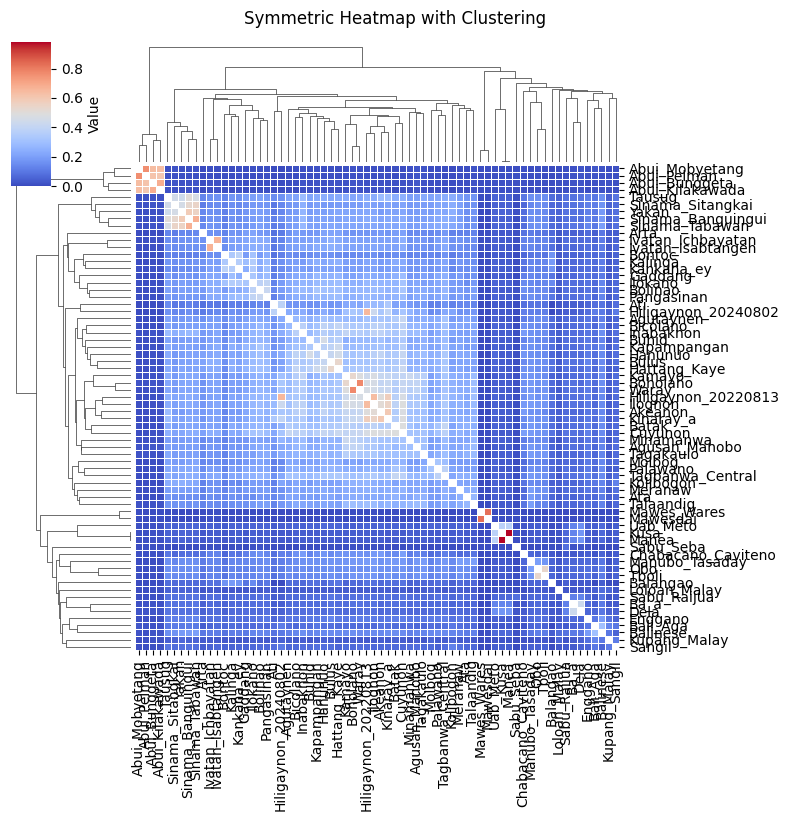

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.eye(len(adj_df), dtype=bool)

# Create a clustered heatmap
sns.clustermap(
    scaled_df,
    cmap="coolwarm",          # or any other colormap you like
    linewidths=0.5,
    mask=mask, 
    figsize=(8, 8),
    xticklabels=True,
    yticklabels=True,
    row_cluster=True,
    col_cluster=True,
    cbar_kws={'label': 'Value'},
    dendrogram_ratio=(0.2, 0.2),  # size of dendrograms
    metric="euclidean",           # distance metric for clustering
    method="average"              # linkage method
)

plt.suptitle("Symmetric Heatmap with Clustering", y=1.02)
plt.show()

In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [61]:
# Remove the index/column labels for PCA
X = adj_scaled_df.values

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

In [62]:
ncomp=15
pca = PCA(n_components=ncomp)
components = pca.fit_transform(X_scaled)
# Explained variance ratios
explained_variance = pca.explained_variance_ratio_

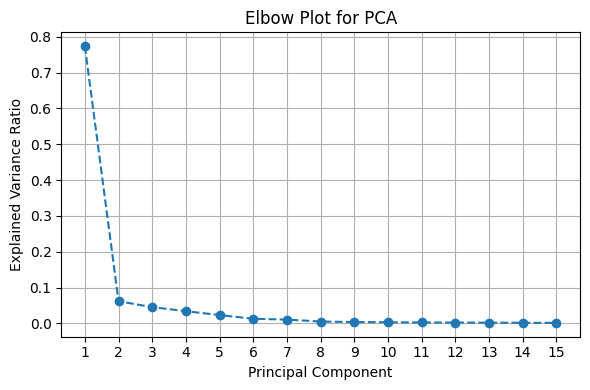

In [63]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, ncomp+1), explained_variance, marker='o', linestyle='--')
plt.xticks(range(1, ncomp+1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot for PCA')
plt.grid(True)
plt.tight_layout()
plt.show()

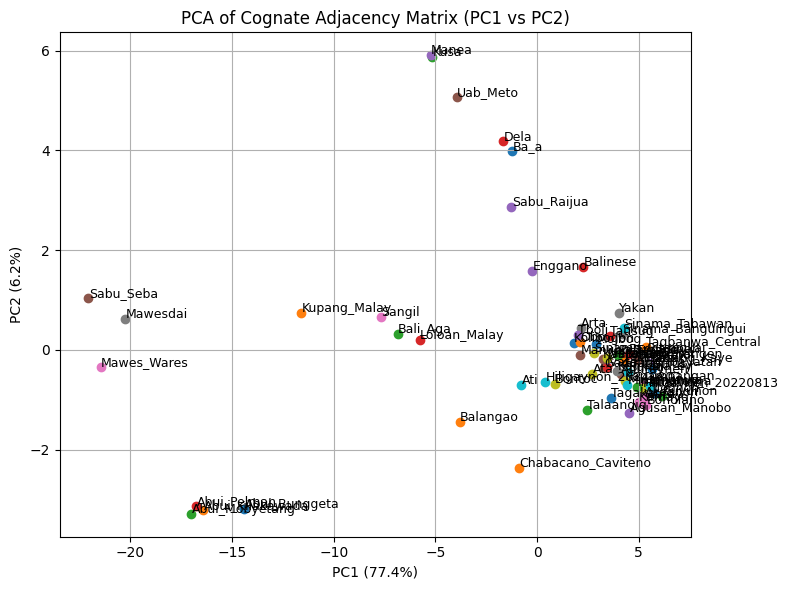

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot only the first two PCs
for i, lang in enumerate(adj_df.index):
    x, y = components[i, 0], components[i, 2]
    plt.scatter(x, y, label=lang)
    plt.text(x + 0.02, y + 0.02, lang, fontsize=9)

plt.title("PCA of Cognate Adjacency Matrix (PC1 vs PC2)")
plt.xlabel("PC1 ({:.1f}%)".format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel("PC2 ({:.1f}%)".format(pca.explained_variance_ratio_[1] * 100))
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
collectionsheet=pd.read_excel("OCSEAN_initial_englishsheet.xlsx")
collectionsheet.head()

,Unnamed: 0,Language_BasedOnMasterSheet,ISO code (from Original_FileName),COUNTRY,LocalWordsPresent,QC_done,AddedToTheUnitedLanguagesMasterFile,Comment,Separator,Mismatches_Eng,Mismatches_IndoOrTaga,Original_FileName,QC_FileName,Google Map Coordinate,latitude,longitude,Used,Has_IPA,Has_English,Language_AsInFile
0,0,Abui Bunggeta,ABZ,Indonesia,604,Yes,Yes,Some English and or Indonesian words in this l...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240605-BUNGGETA_WORDLIST.xlsx,OCSEAN-ABZ_20240605-BUNGGETA_WORDLIST_PostQC.xlsx,NaN,NaN,NaN,True,True,True,Abui_Bunggeta
1,1,Abui Kilakawada,ABZ,Indonesia,604,Yes,Yes,English and English Elicitation notes complete...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240606-KILAKAWADA_WORDLIST.xlsx,OCSEAN-ABZ_20240606-KILAKAWADA_WORDLIST_PostQC...,NaN,NaN,NaN,True,False,True,Abui_Kilakawada
2,2,Abui Mobyetang,ABZ,Indonesia,602,Yes,Yes,English Elicitation = English actually. Some E...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240610-MOBYETANG_WORDLIST.xlsx,OCSEAN-ABZ_20240610-MOBYETANG_WORDLIST_PostQC....,NaN,NaN,NaN,True,False,True,Abui_Mobyetang
3,3,Abui Pelman,ABZ,Indonesia,602,Yes,Yes,English Elicitation = English actually. Some E...,", and ; and ~ (?). Only used , and ;",41,87,OCSEAN-ABZ_20240610-PELMAN_WORDLIST.xlsx,OCSEAN-ABZ_20240610-PELMAN_WORDLIST_PostQC.xlsx,NaN,NaN,NaN,True,False,True,Abui_Pelman
4,10,Agusan Manobo,MSM,the Phillipines,1225,Yes,Yes,Tagalog and English present and both match the...,",",FALSE,FALSE,OCSEAN-MSM_20240517-WORDLIST_1to1228.xlsx,OCSEAN-MSM_20240517-WORDLIST_1to1228_PostQC.xlsx,"9°15'55.8""N 125°33'33.5""E",9.2655,125.559306,True,False,True,Agusan_Manobo


In [66]:
from shapely.geometry import Point # Allows ployying points with geopandas and rxr
import geopandas as gpd

languages=collectionsheet[collectionsheet["latitude"].notnull()].copy()
# Convert to GeoDataFrame
languages["geometry"] = languages.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
languages_gdf = gpd.GeoDataFrame(languages, geometry="geometry", crs="EPSG:4326")
languages_gdf["Latitude"]=languages_gdf["latitude"]
languages_gdf["Longitude"]=languages_gdf["longitude"]
languages_gdf["Language"]=languages_gdf["Language_BasedOnMasterSheet"]
#languages_gdf = languages_gdf.to_crs(rds.rio.crs)
languages_gdf.head()

,Unnamed: 0,Language_BasedOnMasterSheet,ISO code (from Original_FileName),COUNTRY,LocalWordsPresent,QC_done,AddedToTheUnitedLanguagesMasterFile,Comment,Separator,Mismatches_Eng,...,latitude,longitude,Used,Has_IPA,Has_English,Language_AsInFile,geometry,Latitude,Longitude,Language
4,10,Agusan Manobo,MSM,the Phillipines,1225,Yes,Yes,Tagalog and English present and both match the...,",",FALSE,...,9.265500,125.559306,True,False,True,Agusan_Manobo,POINT (125.55931 9.2655),9.265500,125.559306,Agusan Manobo
6,12,Akeanon,AKL,the Phillipines,1123,Yes,"Yes, but there are problems with a lot of words",A lot of mismatching data in both reference la...,", and /",150,...,11.677084,122.322380,True,False,True,Akeanon,POINT (122.32238 11.67708),11.677084,122.322380,Akeanon
9,18,Ati,ATK,the Phillipines,526,Yes,"Yes, but there are problems with a lot of words",It had two columns of interest: `Ati initial l...,",",150,...,110.175500,122.982800,True,False,True,Ati,POINT (122.9828 110.1755),110.175500,122.982800,Ati
10,19,Ba'a,LLG,Indonesia,1175,Yes,Yes,"Very messy data columns, a lot of irrelevant a...",",",57,...,-10.728535,123.061583,True,True,True,Ba_a,POINT (123.06158 -10.72854),-10.728535,123.061583,Ba'a
12,22,Bali Aga,BAN,Indonesia,197,Yes,Yes,NaN,Space in some words? Don't understand the lang...,FALSE,...,-8.237046,115.028282,True,False,True,Bali_Aga,POINT (115.02828 -8.23705),-8.237046,115.028282,Bali Aga


In [33]:
def date_line_remove (geo,long="Longitude"):
    geo["Longitude2"]=[(x-360 if x>0 else x) for x in geo[long]]
    return geo

languages_gdf=date_line_remove(languages_gdf)
languages_gdf.head()

,Unnamed: 0,Language_BasedOnMasterSheet,ISO code (from Original_FileName),COUNTRY,LocalWordsPresent,QC_done,AddedToTheUnitedLanguagesMasterFile,Comment,Separator,Mismatches_Eng,...,longitude,Used,Has_IPA,Has_English,Language_AsInFile,geometry,Latitude,Longitude,Language,Longitude2
4,10,Agusan Manobo,MSM,the Phillipines,1225,Yes,Yes,Tagalog and English present and both match the...,",",FALSE,...,125.559306,True,False,True,Agusan_Manobo,POINT (125.55931 9.2655),9.265500,125.559306,Agusan Manobo,-234.440694
6,12,Akeanon,AKL,the Phillipines,1123,Yes,"Yes, but there are problems with a lot of words",A lot of mismatching data in both reference la...,", and /",150,...,122.322380,True,False,True,Akeanon,POINT (122.32238 11.67708),11.677084,122.322380,Akeanon,-237.677620
9,18,Ati,ATK,the Phillipines,526,Yes,"Yes, but there are problems with a lot of words",It had two columns of interest: `Ati initial l...,",",150,...,122.982800,True,False,True,Ati,POINT (122.9828 110.1755),110.175500,122.982800,Ati,-237.017200
10,19,Ba'a,LLG,Indonesia,1175,Yes,Yes,"Very messy data columns, a lot of irrelevant a...",",",57,...,123.061583,True,True,True,Ba_a,POINT (123.06158 -10.72854),-10.728535,123.061583,Ba'a,-236.938417
12,22,Bali Aga,BAN,Indonesia,197,Yes,Yes,NaN,Space in some words? Don't understand the lang...,FALSE,...,115.028282,True,False,True,Bali_Aga,POINT (115.02828 -8.23705),-8.237046,115.028282,Bali Aga,-244.971718


In [37]:
?ax.set_extent

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      ~/GoogleDrive/University/OCSEAN-2025/RESEARCH/.venv/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py
Type:      method

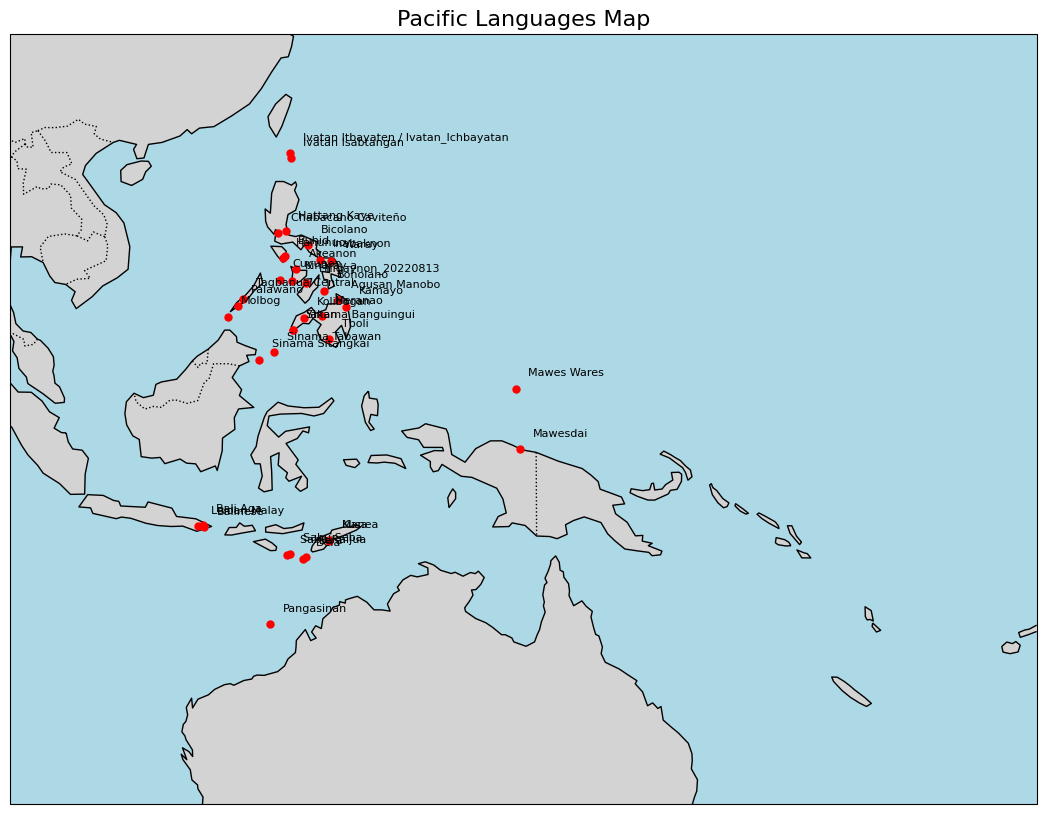

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming polynesia_geo has columns: 'Language', 'Latitude', 'Longitude'

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Set map extent to roughly cover the Pacific region
#ax.set_extent([100, -100, 100, 30], crs=ccrs.PlateCarree())
ax.set_extent([100, 180, -30, 30], crs=ccrs.PlateCarree())

# Add map features for context
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot each language point and label it
for idx, row in languages_gdf.iterrows():
    ax.plot(row['Longitude'], row['Latitude'], 'o', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax.text(row['Longitude'] + 1, row['Latitude'] + 1, row['Language'], fontsize=8, transform=ccrs.PlateCarree())

plt.title("Pacific Languages Map", fontsize=16)
plt.show()